In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set()

This is an analysis of the Online Retail dataset, provided by the UCI, which contains transactions (including cancellations) carried out by an online retailer (mainly focused on gift items) between 01/12/2009 and 09/12/2011.

# Exploratory data analysis

The dataset contains 1067371 entries and has 8 columns. This is a short description of the columns:

* Invoice: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
* Description: Product (item) name. Nominal. 
* Quantity: The quantities of each product (item) per transaction. Numeric. 
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
* Price: Unit price. Numeric. Product price per unit in sterling (£). 
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
* Country: Country name. Nominal. The name of the country where a customer resides.

In [12]:
df = pd.concat(pd.read_excel("/Users/priyam/Downloads/online_retail_II.xlsx", sheet_name=None).values())

In [13]:
df.shape

(1067371, 8)

In [14]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

I have a look at the first 10 entries in the dataset but also at 10 entries chosen randomly to see if the data is clean.

In [15]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [16]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
160938,504807,22027,TEA PARTY BIRTHDAY CARD,12,2010-04-16 12:15:00,0.42,17626.0,United Kingdom
46886,540371,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,2,2011-01-06 16:35:00,9.95,14312.0,United Kingdom
316844,520214,22602,CHRISTMAS RETROSPOT HEART WOOD,24,2010-08-25 07:46:00,0.85,14895.0,United Kingdom
499690,578686,22086,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011-11-25 09:18:00,2.95,13050.0,United Kingdom
35614,539436,85066,CREAM SWEETHEART MINI CHEST,2,2010-12-17 14:49:00,25.49,NaN,United Kingdom
474686,534071,21484,CHICK GREY HOT WATER BOTTLE,4,2010-11-21 11:39:00,3.45,16934.0,United Kingdom
61882,541489,21314,SMALL GLASS HEART TRINKET POT,1,2011-01-18 13:38:00,2.10,15023.0,United Kingdom
12001,490360,72752A,"F.FAIRY,CANDLE IN GLASS,LILY/VALLEY",1,2009-12-04 16:52:00,4.25,13679.0,United Kingdom
452482,532382,21175,GIN + TONIC DIET METAL SIGN,2,2010-11-11 18:24:00,2.10,16081.0,United Kingdom
477728,577074,84012,MAGIC SHEEP WOOL GROWING FROM PAPER,24,2011-11-17 15:04:00,0.85,15399.0,United Kingdom


We see that there are some missing values in the **Customer ID** column, calling the *info* method of the Pandas dataframe we see that also the column **Description** contains missing values. In fact ~ 20 % of the rows have a missing value for the **Customer ID** column which is huge. The datatypes for each columns seem valid except for the **Customer ID** columns which have a float type and it should be int with 5 digits.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


Calling the method **describe** of the Pandas dataframe shows some summary statistics, such as mean, median, quartiles etcs..., for the numerical columns **Quantity** and **Price**. This shows that both columns have negative values which doesn't make sense, you cannot buy less than 0 items and/or for a negative price.

In [18]:
df[["Quantity", "Price"]].describe()

,Quantity,Price
count,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00
std,1.727058e+02,1.235531e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


We now explore the values of the columns in the dataset and in particular the unique values for the non-numerical columns. The compary has shipped orders towards 43 different countries, most of them are in Europe. 

In [19]:
df["Country"].nunique()

43

In [20]:
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

92 % of the transactions are made with customers residing in the United Kingdom, other transactions are mostly made in neighbour countries such as Republic of Ireland, Germany or France.

In [21]:
df["Country"].value_counts(normalize=True).head(10) * 100

United Kingdom    91.938979
EIRE               1.673832
Germany            1.651160
France             1.342551
Netherlands        0.481557
Spain              0.357045
Switzerland        0.298771
Belgium            0.292588
Portugal           0.245463
Australia          0.179225
Name: Country, dtype: float64

In [22]:
print(f"Transactions registered from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Transactions registered from 2009-12-01 07:45:00 to 2011-12-09 12:50:00


In [23]:
print(f"Number of transactions registered: {df['Invoice'].nunique()}")

Number of transactions registered: 53628


The number of transaction is more or less constant during the year but then increases from September to December, as expected since in this period there are a lot of major events such as Halloween and Christmas.

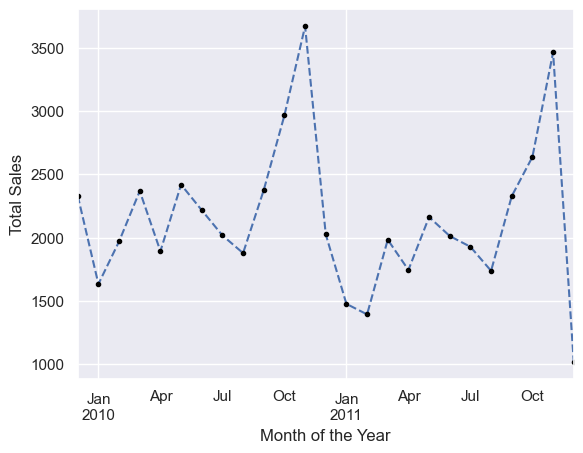

In [24]:
ax = df.set_index('InvoiceDate').resample("M")["Invoice"].nunique().plot(marker=".", 
                                                                         linestyle="--", 
                                                                         markerfacecolor="black",
                                                                         markeredgecolor="black"
                                                                         )
ax.set_ylabel("Total Sales")
ax.set_xlabel("Month of the Year");

In [25]:
print(f"Number of item descriptions: {df['Description'].nunique()}")

Number of item descriptions: 5698


In [26]:
print(f"Number of item stock code: {df['StockCode'].nunique()}")

Number of item stock code: 5305


In [27]:
print(f"Number of unique customers: {df['Customer ID'].nunique()}")

Number of unique customers: 5942


There are some missing values in the **Description** and **Customer ID** columns. Let's have a look at the rows where the values of the column **Description** are missing.

#### Missing values in the **Description** column: 

In [28]:
df["Description"].isnull().mean() * 100

0.4105414143723223

0.41 % percent of the rows in the fisrt sheet have missing values in the **Description** column, in the next cells an example of 10 of those rows is shown. It seems those rows have negative values for the **Quantity** column, a lot of 0.0 in the **Price** column and missing values in the **Customer ID** column.

In [29]:
df[df["Description"].isnull()].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
147799,549145,21421,NaN,26,2011-04-06 15:28:00,0.0,NaN,United Kingdom
225307,511129,84990,NaN,1,2010-06-07 11:01:00,0.0,NaN,United Kingdom
264266,514946,21166,NaN,11,2010-07-07 11:44:00,0.0,NaN,United Kingdom
80317,496732,79333,NaN,-1,2010-02-03 14:25:00,0.0,NaN,United Kingdom
83561,497179,90197C,NaN,-11,2010-02-05 17:28:00,0.0,NaN,United Kingdom
82473,496971,21083,NaN,-7,2010-02-04 19:46:00,0.0,NaN,United Kingdom
431625,530635,85132B,NaN,-90,2010-11-03 16:07:00,0.0,NaN,United Kingdom
242905,558378,79161A,NaN,-13,2011-06-28 16:27:00,0.0,NaN,United Kingdom
150623,549500,79321,NaN,1,2011-04-08 15:06:00,0.0,NaN,United Kingdom
165038,550763,84666,NaN,-5,2011-04-20 12:11:00,0.0,NaN,United Kingdom


All the rows contains missing values for the **Customer ID** column as shown below.

In [30]:
np.all(df[df["Description"].isnull()]["Customer ID"].isnull())

True

In [31]:
(df[df["Description"].isnull()]["Quantity"] <= 0).mean() * 100

61.364673664993155

In [32]:
all(df[df["Description"].isnull()]["Country"] == "United Kingdom")

True

In [33]:
all(df[df["Description"].isnull()]["Price"] == 0.0)

True

61 % of the rows have a negative value for the column **Quantity**. Also the column **Country** is filled only with *United Kingdom*, and the **Price** column is filled with zeros. Those rows maybe revealed some dirty data patterns like negative quantities or products that a price of 0 that we can find in other rows. For the latter it might be possible that some items are free, I will see with further exploration. 

#### Missing values in the **Customer ID** column:

Let's now look at the rows filled only with missing values in the **Customer ID** column, which represent 22% of the data.

In [34]:
df["Customer ID"].isnull().mean() * 100

22.766872999172733

In [35]:
df[df["Customer ID"].isnull()].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
57022,541129,22719,GUMBALL MONOCHROME COAT RACK,2,2011-01-14 10:14:00,2.46,NaN,United Kingdom
509245,579297,22460,EMBOSSED GLASS TEALIGHT HOLDER,1,2011-11-29 11:23:00,2.46,NaN,United Kingdom
523829,538071,22089,PAPER BUNTING VINTAGE PAISLEY,1,2010-12-09 14:09:00,5.91,NaN,United Kingdom
26935,538524,21982,PACK OF 12 SUKI TISSUES,1,2010-12-13 09:35:00,0.85,NaN,United Kingdom
7848,490074,20960,WATERMELON BATH SPONGE,1,2009-12-03 14:39:00,2.57,NaN,United Kingdom
13537,537434,22309,TEA COSY RED STRIPE,1,2010-12-06 16:57:00,5.06,NaN,United Kingdom
330952,521691,47566,PARTY BUNTING,1,2010-09-07 17:19:00,4.65,NaN,United Kingdom
351666,567668,21947,SET OF 6 HEART CHOPSTICKS,2,2011-09-21 15:29:00,2.46,NaN,United Kingdom
198514,554054,21934,SKULL SHOULDER BAG,1,2011-05-20 15:29:00,3.29,NaN,United Kingdom
340593,522620,85059,FRENCH ENAMEL WATER BASIN,1,2010-09-15 15:14:00,7.62,NaN,United Kingdom


In [36]:
df[df["Customer ID"].isnull()]["Description"].nunique()

4872

In [37]:
(df[df["Customer ID"].isnull()]["Quantity"] <= 0).mean() * 100

1.7308143386816017

In [38]:
(df[df["Customer ID"].isnull()]["Price"] <= 0.0).mean() * 100

2.5250301431646003

There is not a pattern or a clear reason fo why these rows don't have a **Customer ID** from the data.

#### Negative prices and quantities

0.6 % of the dataset has negative prices. Let's have a look at rows the values in the **Quantity** column is less or equal than zero, they represent 2.15 % of the total dataset.

In [39]:
(df["Price"] <= 0).mean() * 100

0.5815222635803297

In [40]:
(df["Quantity"] <= 0).mean() * 100

2.1501427338760375

In [41]:
df[df["Quantity"] <= 0].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
94552,C498295,84466,TOP SECRET PEN SET,-9,2010-02-18 09:04:00,1.25,17406.0,United Kingdom
391032,C527020,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,-12,2010-10-14 11:52:00,1.45,12589.0,France
441512,C574584,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,-180,2011-11-04 18:11:00,1.00,15482.0,United Kingdom
378709,C569663,21670,BLUE SPOT CERAMIC DRAWER KNOB,-1,2011-10-05 13:29:00,1.45,17841.0,United Kingdom
515980,C537413,22834,HAND WARMER BABUSHKA DESIGN,-72,2010-12-06 15:07:00,2.10,14409.0,United Kingdom
305782,C519221,M,Manual,-1,2010-08-15 12:17:00,109.61,NaN,EIRE
142643,C502899,21874,GIN AND TONIC MUG,-1,2010-03-29 12:03:00,1.25,14680.0,United Kingdom
271187,C515701,22649,STRAWBERRY FAIRY CAKE TEAPOT,-1,2010-07-14 12:25:00,4.95,18217.0,United Kingdom
255448,C559347,21673,WHITE SPOT BLUE CERAMIC DRAWER KNOB,-24,2011-07-07 17:22:00,1.25,18072.0,United Kingdom
59379,C541284,M,Manual,-36,2011-01-17 12:45:00,0.87,17744.0,United Kingdom


Looking at the **Invoice** column there is a *C* before the number in most of the rows (85% of them) and according to the data description it means that the order was canceled.

In [42]:
df[df["Quantity"] <= 0]["Invoice"].astype("str").str.startswith("C").mean() * 100

84.93681917211329

In [43]:
(df[df["Invoice"].astype("str").str.startswith("C")]["Quantity"] <= 0.).mean() * 100

99.99487021647685

Let's create a new columns called **TotalPrice** which simply equals to **Quantity** $\times$ **Price**. Rows with a less or equal to zero represent 2.4% of the dataset and consist of the rows with either a negative price or a negative quantity.

In [44]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [45]:
(df["TotalPrice"] <= 0).mean() * 100

2.4077851093949527

In [46]:
((df["Price"] <= 0) | (df["Quantity"] <= 0) ).mean() * 100

2.4077851093949527

In [47]:
df[df["TotalPrice"] <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


Keeping all rows with **TotalPrice** $>$ 0 removes all rows with missing values in the **Description** columns, and also removes all canceled orders but 1.

In [48]:
all(~df[df["TotalPrice"] > 0]["Description"].isnull())

True

In [49]:
df[(df["Invoice"].astype("str").str.startswith("C")) & (df["TotalPrice"] > 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom,373.57


#### Further exploration with cleaned data.

Let's now create a function that loads the data, and filter out rows with negative **TotalPrice** and cancelled orders. There is an argument in the function of keep rows with missing values in the **Customer ID** column.

In [50]:
def load_df(sheet_name="Year 2009-2010", keepna=True):
    df = pd.read_excel("/Users/priyam/Downloads/online_retail_II.xlsx", 
                       sheet_name=sheet_name, 
                       parse_dates=["InvoiceDate"],
                       dtype={"Invoice": "str", "StockCode": "str"})
    
    if isinstance(df, dict):
        df = pd.concat(df.values())
    
    df["TotalPrice"] = df["Quantity"] * df["Price"]
    df = df.query("TotalPrice > 0")
    df = df[~df["Invoice"].str.startswith("C")]
    df = df[~df["StockCode"].str.contains("TEST")]
    
    if not keepna:
        df.dropna(inplace = True)
        
    df.drop_duplicates(inplace=True)
        
    assert all(df["InvoiceDate"] > datetime(2009,1,1))
    assert all(df["InvoiceDate"] < datetime(2012,1,1))
    
    return df

In [51]:
df = load_df(None)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007903 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1007903 non-null  object        
 1   StockCode    1007903 non-null  object        
 2   Description  1007903 non-null  object        
 3   Quantity     1007903 non-null  int64         
 4   InvoiceDate  1007903 non-null  datetime64[ns]
 5   Price        1007903 non-null  float64       
 6   Customer ID  779415 non-null   float64       
 7   Country      1007903 non-null  object        
 8   TotalPrice   1007903 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 76.9+ MB


Now that we have prepared the dataset let's explore further. 22 % percent of the rows have missing values in the **Customer ID**. values which is a lot and quite unfortunate as we cannot track next orders from those customers.

There is a total of 100k orders in the dataset. Below are listed the most sold items for customers with and without **Customer ID**, we see they don't buy the same items.

In [53]:
df.dropna().groupby("Description")["Quantity"].sum().sort_values(ascending=False).head()

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
Name: Quantity, dtype: int64

In [54]:
df[df["Customer ID"].isnull()].groupby("Description")["Quantity"].sum().sort_values(ascending=False).head()

Description
CHARLOTTE BAG SUKI DESIGN          12139
PAPER CHAIN KIT 50'S CHRISTMAS      6704
POPCORN HOLDER                      5830
SMALL POPCORN HOLDER                5606
RED RETROSPOT CHARLOTTE BAG         5495
Name: Quantity, dtype: int64

However the item than brought more money to the company is not "WORLD WAR 2 GLIDERS ASSTD DESIGNS" but "REGENCY CAKESTAND 3 TIER" for a total of 278k £. In comparison "WORLD WAR 2 GLIDERS ASSTD DESIGNS" only grossed 25k £.

In [55]:
df.dropna().groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head()

Description
REGENCY CAKESTAND 3 TIER              277656.25
WHITE HANGING HEART T-LIGHT HOLDER    247048.01
PAPER CRAFT , LITTLE BIRDIE           168469.60
Manual                                151777.67
JUMBO BAG RED RETROSPOT               134307.44
Name: TotalPrice, dtype: float64

In [56]:
df.loc[df["Description"] == "WORLD WAR 2 GLIDERS ASSTD DESIGNS"]["TotalPrice"].sum()

24445.61

Let's check what are the most expensive items. As shown below the 5 most expensive items are all bought by unknown/unregistered customers with prices up to 25k £. Looking only at the customers with a **Customer ID** the 5 most expensive items have lower prices than for unknown customers. The plot below shows the distributions of the price per item for rows with and without missing values in the **Customer ID**, the distributions are highly skewed but we can see that unknown customers buy more expensive items the known customers.

In [57]:
df.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom,25111.09
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,10953.50
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom,10953.50


In [58]:
df.dropna().sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,10953.50
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063.0,United Kingdom,10468.80
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom,8985.60
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
129987,501768,M,Manual,1,2010-03-19 11:45:00,6958.17,15760.0,Norway,6958.17


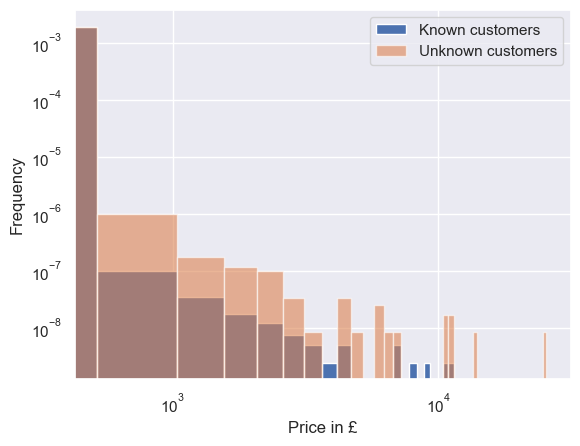

In [59]:
bounds=(0, 26000)
bins=50
ax = df.dropna()["Price"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = df[df["Customer ID"].isnull()]["Price"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, 
                                                 label="Unknown customers")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

In [60]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

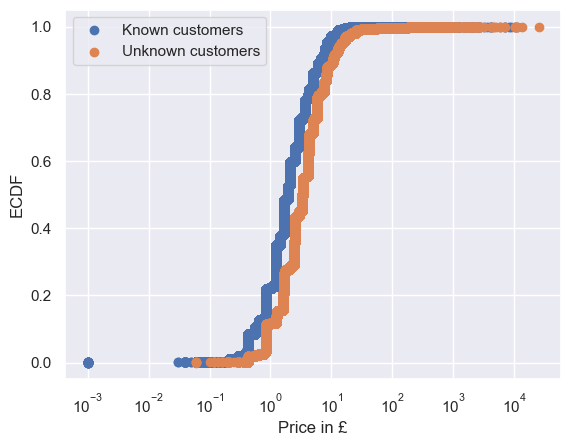

In [61]:
price_known = df.dropna()["Price"].values
price_unknown = df[df["Customer ID"].isnull()]["Price"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(price_known), label="Known customers")
ax.scatter(*ecdf(price_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

The plot below shows that customers with unknown **Customer ID** also order less items than registered customers.

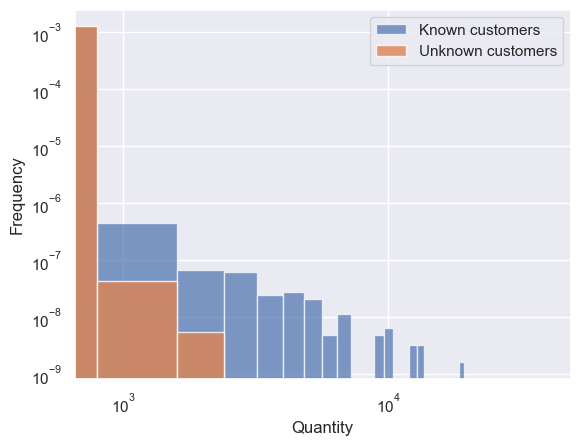

In [62]:
bounds=(0, 40000)
bins=50
ax = df.dropna()["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers", alpha=0.7)
_ = df[df["Customer ID"].isnull()]["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, 
                                                    label="Unknown customers", alpha=0.8)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Quantity")
_ = ax.legend()

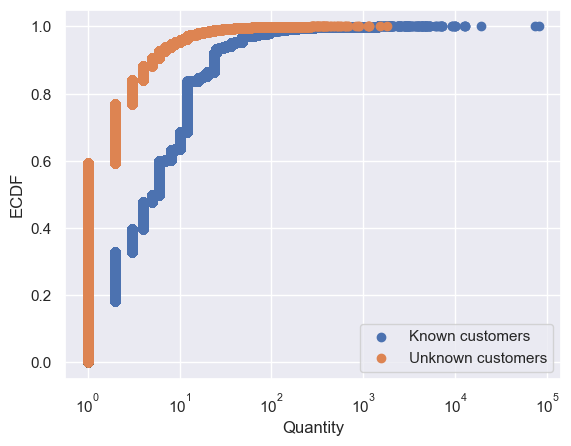

In [63]:
quant_known = df.dropna()["Quantity"].values
quant_unknown = df[df["Customer ID"].isnull()]["Quantity"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(quant_known), label="Known customers")
ax.scatter(*ecdf(quant_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Quantity")
ax.legend()

Let's check the total price and total quantity of items ordered per invoice. Customers without **Customer ID** pay higher invoice bills that registered customers.

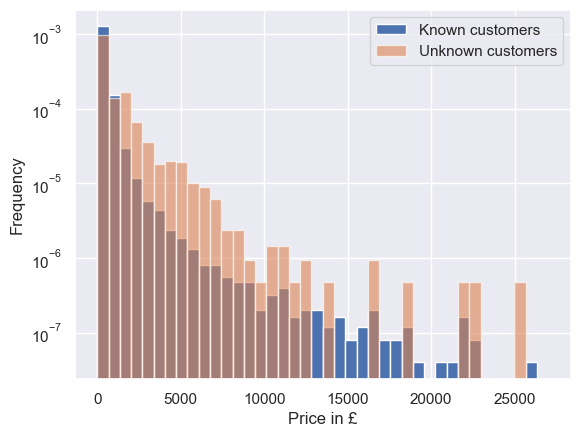

In [64]:
df_inv = df.dropna().groupby("Invoice").agg({"TotalPrice": "sum", "Quantity":"sum"})
df_inv_na = df[df["Customer ID"].isnull()].groupby("Invoice").agg({"TotalPrice": "sum", "Quantity":"sum"})

bounds=(0, 27000)
bins=40
ax = df_inv["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = df_inv_na["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, label="Unknown customers")
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

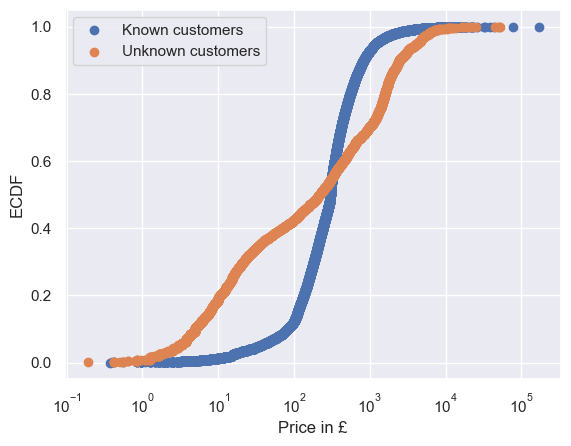

In [65]:
totprice_known = df.dropna().groupby("Invoice")["TotalPrice"].sum().values
totprice_unknown = df[df["Customer ID"].isnull()].groupby("Invoice")["TotalPrice"].sum().values

f, ax = plt.subplots()
ax.scatter(*ecdf(totprice_known), label="Known customers")
ax.scatter(*ecdf(totprice_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

The figure below shows a scatter plot with the total quantity of items per invoice in the x axis versus the total price per invoice on the y-axis. We clearly see two different buying patterns between the two sets of customers, the customers without **Customer ID** buy less items but more expensive items than customers with a **Customer ID**.

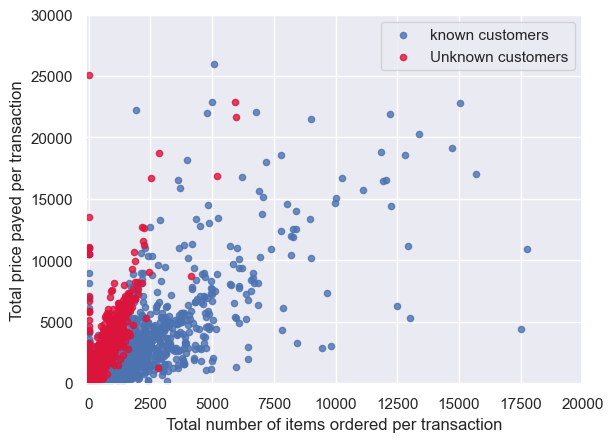

In [66]:
ax = df_inv.plot(kind="scatter", x="Quantity", y="TotalPrice", alpha=0.8, label="known customers")
df_inv_na.plot(kind="scatter", x="Quantity", y="TotalPrice", ax=ax, color="crimson", alpha=0.8, label="Unknown customers")
ax.set_ylim(-100, 30000)
ax.set_xlim(-100, 20000)
ax.set_ylabel("Total price payed per transaction")
ax.set_xlabel("Total number of items ordered per transaction")
_ = ax.legend()


# Segmentation

A way to create customer segments based on their purchases patterns is to perform a RFM (Recency, Frequency, Monetary) analysis. It groups the customers on the basis of their previous purchase transactions. Below are the definitions of each term in RFM:

* Recency: Time since customer's last transaction (with a reference date being the 10th of December 2011)

* Frequency: Total number of transactions 

* Monetary: Total money spend by the customer.

We will create a new dataframe with these metrics computed for each customers. We therefore need to drop the rows with missing values in the **Customer ID** column.

In [67]:
from datetime import timedelta
snapshot_date = max(df.InvoiceDate) +timedelta(days=1)
#snapshot_date = datetime(2012, 1, 1)

In [68]:
rfm = df.dropna().groupby("Customer ID").agg({"Invoice": lambda x: x.nunique(),
                                              "InvoiceDate": lambda date: (snapshot_date - date.max()).days,
                                              "TotalPrice": "sum"})

rfm.rename(columns= {'InvoiceDate': 'recency',
                     'Invoice': 'frequency',
                      'TotalPrice': 'monetary'}, inplace= True)

rfm.head(5)

,frequency,recency,monetary
Customer ID,,,
12346.0,3,326,77352.96
12347.0,8,2,4921.53
12348.0,5,75,2019.40
12349.0,4,19,4428.69
12350.0,1,310,334.40


In [69]:
rfm.describe()

,frequency,recency,monetary
count,5878.000000,5878.000000,5878.000000
mean,6.287683,201.331916,2955.865646
std,13.009300,209.338707,14440.674831
min,1.000000,1.000000,2.950000
25%,1.000000,26.000000,342.280000
50%,3.000000,96.000000,867.740000
75%,7.000000,380.000000,2248.305000
max,398.000000,739.000000,580987.040000


Let's plot the distributions of the three quantities.

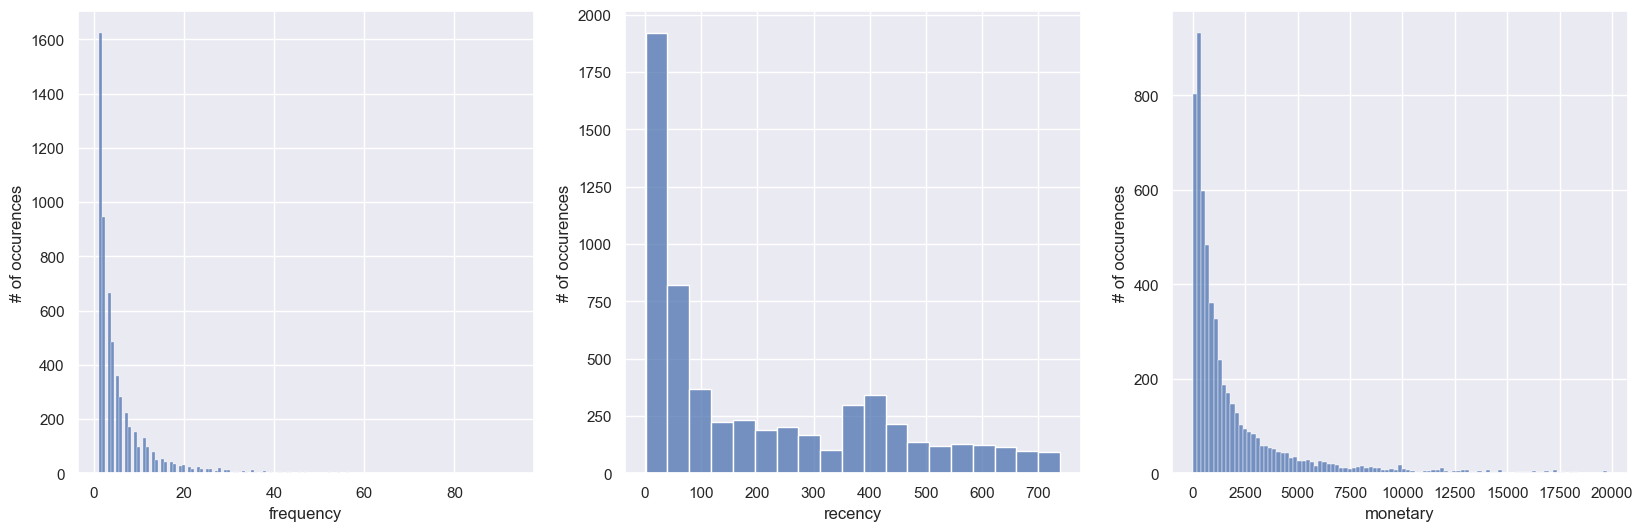

In [70]:
f, ax = plt.subplots(1, 3, figsize=(20, 6))
for a in ax:
    a.set_ylabel("# of occurences")

sns.histplot(rfm.query("frequency < 100")["frequency"], kde=False, ax=ax[0])

sns.histplot(rfm["recency"], kde=False, ax=ax[1])

sns.histplot(rfm.query("monetary < 20000")["monetary"], kde=False, ax=ax[2]);

The next task is two find clusters in the RFM values, this will be done with the KMeans algorithm of scikit-learn.

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

KMeans algorithm assumptions:
* Symmetric distribution of variables (not skewed)
* Variables with same average values
* Variables with same variance

So we need to unskew the variables (with a log transformation) and standardize them afterwards.

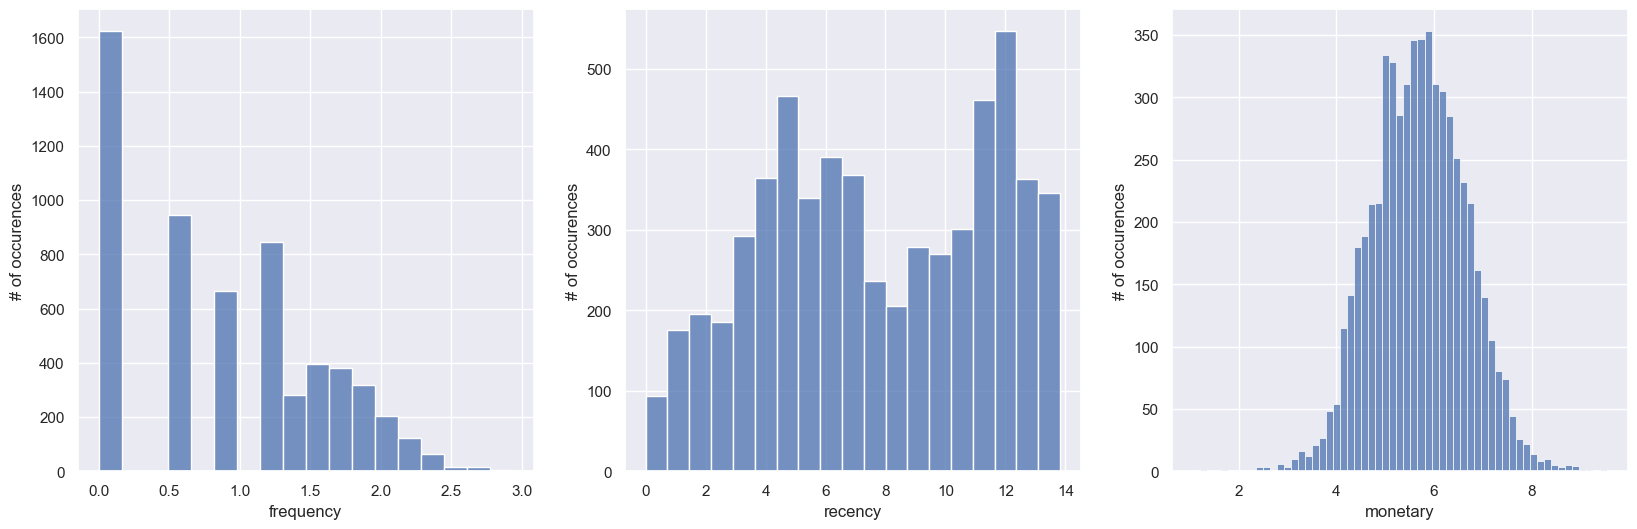

In [72]:
def plot_dist_transformed(transformation=lambda x: x):

    f, ax = plt.subplots(1, 3, figsize=(20, 6))
    for i, a in enumerate(ax):
        a.set_ylabel("# of occurences")
        
        col = rfm.columns[i]
        sns.histplot(transformation(rfm[col]), kde=False, ax=a)
        a.set_xlabel(col)
        
plot_dist_transformed(lambda x: stats.boxcox(x)[0])

In [73]:
rfm_unskewed = np.array([stats.boxcox(rfm[["frequency", "recency", "monetary"]].values[:,i])[0] for i in range(3)]).T

In [74]:
scaler = StandardScaler()
scaler.fit(rfm_unskewed)
rfm_scaled = pd.DataFrame(scaler.transform(rfm_unskewed), columns=["frequency", "recency", "monetary"])

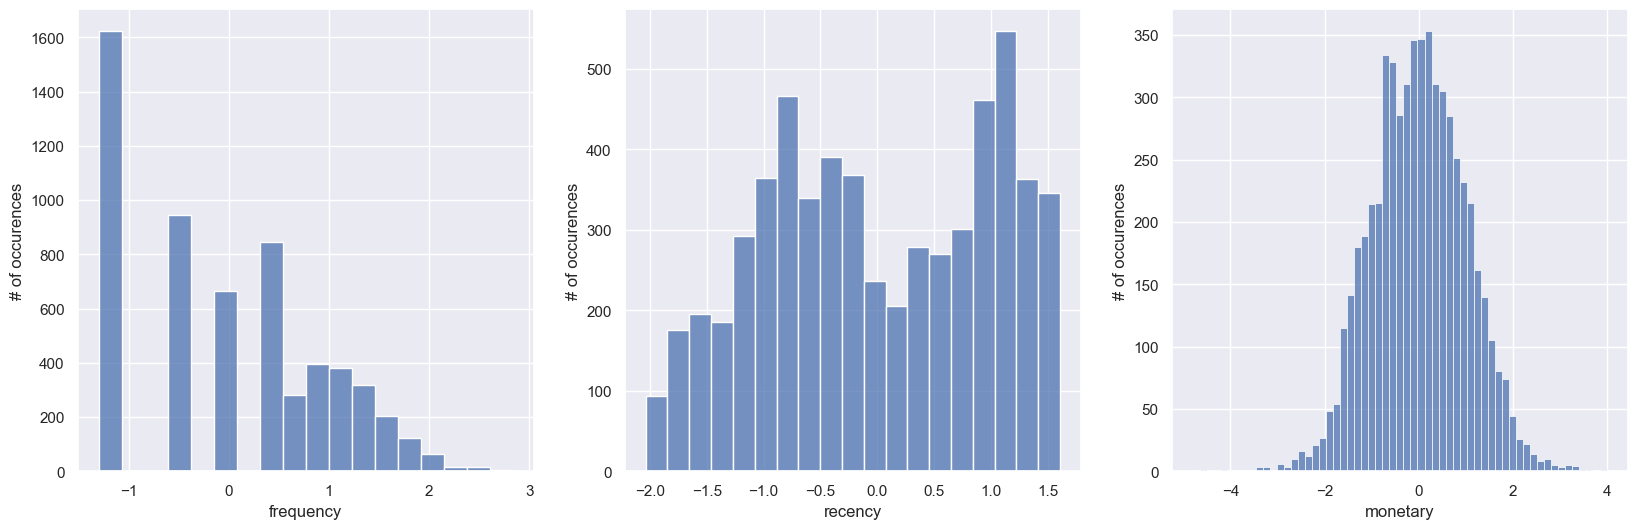

In [75]:
def plot_dist_scaled(rfms=rfm_scaled):

    f, ax = plt.subplots(1, 3, figsize=(20, 6))
    for i, a in enumerate(ax):
        a.set_ylabel("# of occurences")
        
        col = rfms.columns[i]
        sns.histplot(rfms[col], kde=False, ax=a)
        a.set_xlabel(col)
        
plot_dist_scaled()

Now we need to find the optimum number of clusters, to do so we will compute different metrics:

* the Silhouette score (higher is best)
* the Calinski and Harabasz score (higher is best)
* the Davies-Bouldin score (lower is best)
* Elbow method on the inertia metric (best number of clusters at the elbow/kink).

In [76]:
inertias = []
silhouettes = []
calinski = []
davies = []
n_clusters = np.arange(2, 10, 1)

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(rfm_scaled, kmeans.predict(rfm_scaled)))
    calinski.append(calinski_harabasz_score(rfm_scaled, kmeans.predict(rfm_scaled)))
    davies.append(davies_bouldin_score(rfm_scaled, kmeans.predict(rfm_scaled)))

Text(0, 0.5, 'Inertia score')

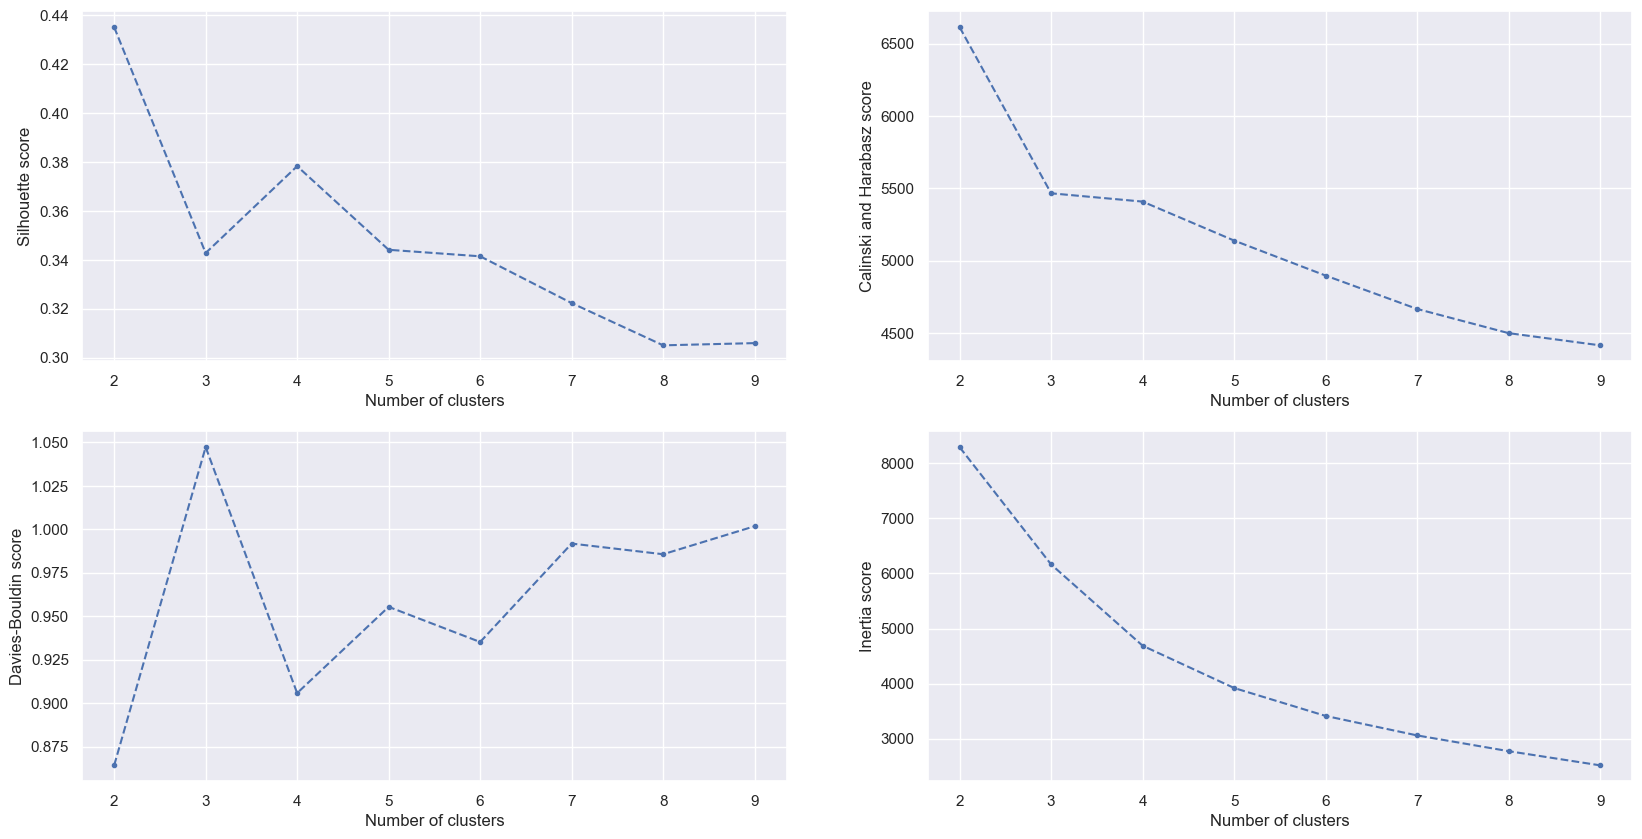

In [77]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))
for a in ax.flatten():
    a.set_xlabel("Number of clusters")

ax[0, 0].plot(n_clusters, silhouettes, ".--")
ax[0, 0].set_ylabel("Silhouette score")

ax[0, 1].plot(n_clusters, calinski, ".--")
ax[0, 1].set_ylabel("Calinski and Harabasz score")

ax[1, 0].plot(n_clusters, davies, ".--")
ax[1, 0].set_ylabel("Davies-Bouldin score")

ax[1, 1].plot(n_clusters, inertias, ".--")
ax[1, 1].set_ylabel("Inertia score")

The plot suggest that the best number of clusters is 4, Kmeans will compute and assign the clusters for each customer.

In [78]:
nclusters=4
kmeans = KMeans(n_clusters=nclusters, random_state=13)
kmeans.fit(rfm_scaled)

rfm["cluster"] = kmeans.predict(rfm_scaled)

In [79]:
rfm.head()

,frequency,recency,monetary,cluster
Customer ID,,,,
12346.0,3,326,77352.96,3
12347.0,8,2,4921.53,0
12348.0,5,75,2019.40,3
12349.0,4,19,4428.69,0
12350.0,1,310,334.40,1


Below is the number of customers in each cluster.

In [80]:
rfm["cluster"].value_counts()

0    1683
1    1553
3    1406
2    1236
Name: cluster, dtype: int64

In [81]:
rfm.groupby("cluster").mean()

,frequency,recency,monetary
cluster,,,
0,15.522282,32.453357,8246.041853
1,1.188023,430.620734,278.899640
2,2.394822,39.729773,665.015366
3,4.288762,292.283073,1594.167637


We computed the mean value of the RFM for each cluster of customers:

Cluster #0 seems to be best cluster, which contains most people, is the group that spends more money and made the most transactions, and in average had their last transactions 34 days ago. Those are the **regular customers** and some marketing decisions can be taken for those users, free shipping is an example.

The cluster #2 is the next best cluster, because the spend a lot of money. However the customers in that group haven't come for a while. It might be a good idea to remind them of the company and proposes new products/deals etc... in oder to move those customers to another group.

The cluster #3 is the best after the #2. Those spent less money, ordered less and had their last transactions few months ago. Those might categorized as **occasionnal customers**, who comes from time to time.

The cluster #1 didn't spend much and didn't come for a very long time in avergae they have probably stop using the service, churned by now.

Let's plot the normalized distributions of the RFM quantities for each cluster.

/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/3240613501.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_c.query("frequency < 30")["frequency"], kde=True, ax=ax[0],
/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/3240613501.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

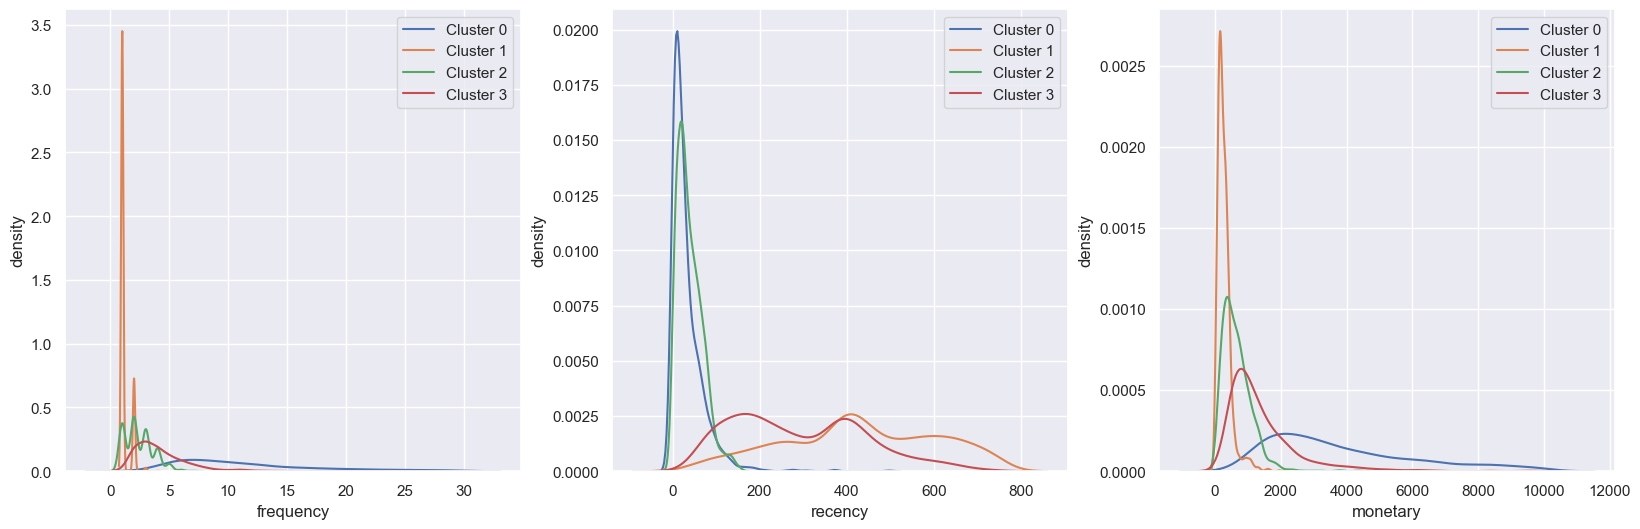

In [84]:
f, ax = plt.subplots(1, 3, figsize=(20, 6))
for a in ax:
    a.set_ylabel("density")
    
for c in range(nclusters):
    rfm_c =  rfm.query(f"cluster == {c}")
    label = f"Cluster {c}"

    sns.distplot(rfm_c.query("frequency < 30")["frequency"], kde=True, ax=ax[0], 
                 label=label, hist=False, norm_hist=True)

    sns.distplot(rfm_c["recency"], kde=True, ax=ax[1], label=label, hist=False, 
                 norm_hist=True)

    sns.distplot(rfm_c.query("monetary < 10000")["monetary"], kde=True, ax=ax[2], 
                 label=label, hist=False, norm_hist=True)
    
for a in ax:
    a.legend();

In [85]:
rfm

,frequency,recency,monetary,cluster
Customer ID,,,,
12346.0,3,326,77352.96,3
12347.0,8,2,4921.53,0
12348.0,5,75,2019.40,3
12349.0,4,19,4428.69,0
12350.0,1,310,334.40,1
...,...,...,...,...
18283.0,22,4,2664.90,0
18284.0,1,432,461.68,1
18285.0,1,661,427.00,1


In [86]:
rfm

,frequency,recency,monetary,cluster
Customer ID,,,,
12346.0,3,326,77352.96,3
12347.0,8,2,4921.53,0
12348.0,5,75,2019.40,3
12349.0,4,19,4428.69,0
12350.0,1,310,334.40,1
...,...,...,...,...
18283.0,22,4,2664.90,0
18284.0,1,432,461.68,1
18285.0,1,661,427.00,1


/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/1484561318.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(toplot, kde=True, ax=a, label=label, hist=False)#, bins=bins, hist_kws=dict(range=ranges[col]))
/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/1484561318.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https:/

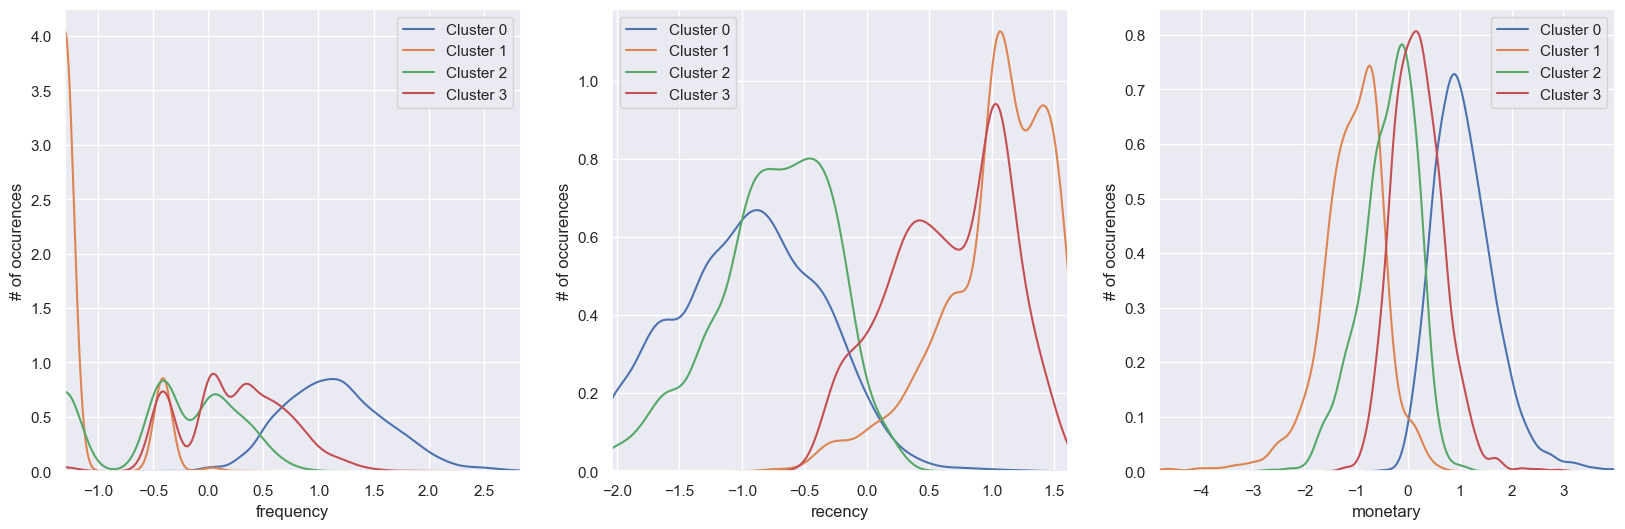

In [87]:
def plot_dist_transformed_cluster(transformation=lambda x: x, columns=["frequency", "recency", "monetary"]):

    f, ax = plt.subplots(1, 3, figsize=(20, 6))
    
    bins = 30
    
    ranges = {}
    
    rfm_ = pd.DataFrame(scaler.transform(transformation(rfm[columns])), columns=columns)
    rfm_["cluster"] = rfm["cluster"].values
    
    
    for i, a in enumerate(ax):
        a.set_ylabel("# of occurences")
        col = rfm_.columns[i]
        x_min, y_min = min(rfm_[col]), max(rfm_[col])
        ranges[col] = (x_min, y_min)
        a.set_xlim(x_min, y_min)
        a.set_xlabel(col)
        
    for c in range(nclusters):
        rfm_c =  rfm_.query(f"cluster == {c}")
        label = f"Cluster {c}"
    
        for i, a in enumerate(ax):
            col = rfm_c.columns[i]
            toplot = rfm_c[col]
            sns.distplot(toplot, kde=True, ax=a, label=label, hist=False)#, bins=bins, hist_kws=dict(range=ranges[col]))
            a.legend()
        
plot_dist_transformed_cluster(lambda x: np.array([stats.boxcox(x.values[:,i])[0] for i in range(3)]).T)

# Churn prediction

In order to predict wether a customer is active or inactive (alive or dead) in a non-contractual business we can use the RFM. The BG/NBD models, described [here](http://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf), can compute a "customer lifetime value". This is the first I work with this so I don't know the details yet, but the model and other utilities are implemented in the nice [lifetimes package](https://lifetimes.readthedocs.io/en/latest/index.html).

We will build a slightly different RFM dataset using utilities from the lifetimes packages where:

* frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.
* T represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.
* recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)
* monetary_value represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.

In [89]:
from lifetimes.utils import summary_data_from_transaction_data
rfml = summary_data_from_transaction_data(df.dropna(), "Customer ID", "InvoiceDate", "TotalPrice")

In [90]:
rfml.head()

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.0,2.0,322.0,647.0,38662.955000
12347.0,7.0,402.0,404.0,615.714286
12348.0,4.0,363.0,438.0,449.310000
12349.0,3.0,571.0,589.0,1120.056667
12350.0,0.0,0.0,310.0,0.000000


In [91]:
rfml.describe()

,frequency,recency,T,monetary_value
count,5878.000000,5878.000000,5878.000000,5878.000000
mean,4.631337,273.380401,474.247193,317.689877
std,9.999831,258.959670,223.078296,2306.280368
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,313.000000,0.000000
50%,2.000000,221.000000,530.000000,207.117500
75%,5.000000,512.000000,668.000000,368.045909
max,254.000000,738.000000,738.000000,168469.600000


Now we will fit the model, we get a summary on the fitted parameters of the model and their uncertainty.

In [92]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(rfml["frequency"], rfml["recency"], rfml["T"])

bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.663390,0.015844,0.632336,0.694443
alpha,63.235424,1.936315,59.440248,67.030601
a,0.108172,0.015347,0.078091,0.138252
b,2.401727,0.520377,1.381789,3.421666


From the fitted model we can do many nice things for instance the expected number of transactions an artificial customer is to make in the next time period (1 day), given his or her recency (age at last purchase) and frequency (the number of repeat transactions he or she has made).

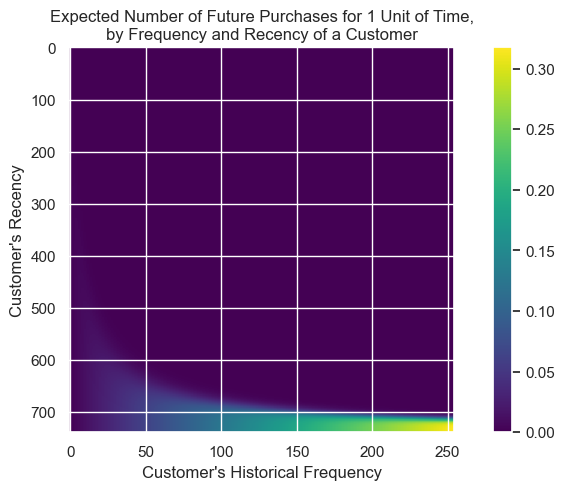

In [93]:
from lifetimes.plotting import plot_frequency_recency_matrix
f = plt.figure(figsize=(10, 5))
plot_frequency_recency_matrix(bgf, cmap="viridis");

We can see that if a customer has bought ~250 times from the retail service, and their latest purchase was when they were a bit older than 700 weeks (given the individual is ~700 weeks old), then they are the best customers (bottom-right). The coldest customers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in weeks.

We can also plot the probability of still being alive.

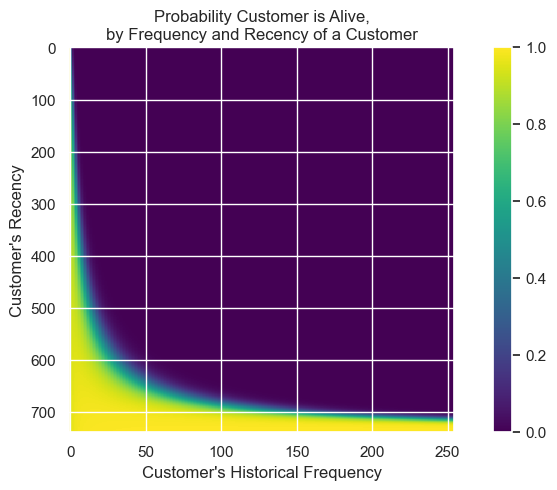

In [94]:
from lifetimes.plotting import plot_probability_alive_matrix
f = plt.figure(figsize=(10, 5))
plot_probability_alive_matrix(bgf, cmap="viridis");

### Have any users churned during the second half of 2011?

To determine this I will use the probabilities histories of still being alive as a function of the time computed from the BG/NBD model.

In [96]:
from lifetimes.utils import calculate_alive_path
from tqdm import tqdm

customer_ids = df.dropna()["Customer ID"].unique()

alive_paths = {}
for i, cid in enumerate(tqdm(customer_ids)):
    days_since_birth = int(rfml.loc[cid]["T"])
    sp_trans = df[df["Customer ID"] == cid]
    alive_paths[cid] = calculate_alive_path(bgf, sp_trans, "InvoiceDate", days_since_birth)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5878/5878 [01:06<00:00, 88.09it/s]


I computed the "alive paths" for each customers (probability of still being alive), an example of those paths is plotted below. The vertical red lines represent the date of each purchase.

In [97]:
from lifetimes.plotting import plot_history_alive

def plot_path(cid, ax=None, july_line=False):
    days_since_birth = int(rfml.loc[cid]["T"])
    sp_trans = df[df["Customer ID"] == cid]
    plot_history_alive(bgf, days_since_birth, sp_trans, "InvoiceDate", ax=ax)
    if july_line:
        plt.vlines(datetime(2011, 7, 1), 0, 1, color="forestgreen")

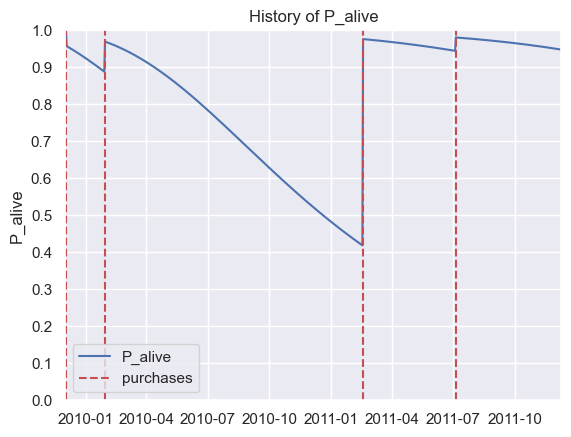

In [98]:
plot_path(13085)

I will collect the **Customer ID** of the customers that have probably churned in the second half of 2011, to do so I need to discard the customers that churned before that.

In [99]:
ndays = (df["InvoiceDate"].max() - datetime(2011, 7, 1)).days

inactive_after_july = []
for k, v in alive_paths.items():
    
    # if customer made his first order before july 2011
    if len(v) >= ndays:
        # if minimum probability of still being alive is less
        # than 0.5, the customer is considered to have churned
        # before july 2011
        if min(v[:-ndays]) < 0.5:
            continue
            
        v = list(v)[-ndays:]
        
    # if one there is one transaction after septembre 2011 we consider
    # the user will not churn.
    if df.loc[df["Customer ID"] == k, "InvoiceDate"].max() > datetime(2011, 9, 1):
        continue

    # if probability of still being alive in the second half of
    # 2011 is less than 0.3 I consider that the customer have churned.
    if min(v) < 0.3:
        inactive_after_july.append(k)

In [100]:
print(f"Number of users that probably churned in the second half of 2011: {len(inactive_after_july)}")

Number of users that probably churned in the second half of 2011: 36


Let's plot some "alive paths" of those users to make sure they have probably churned during this period.

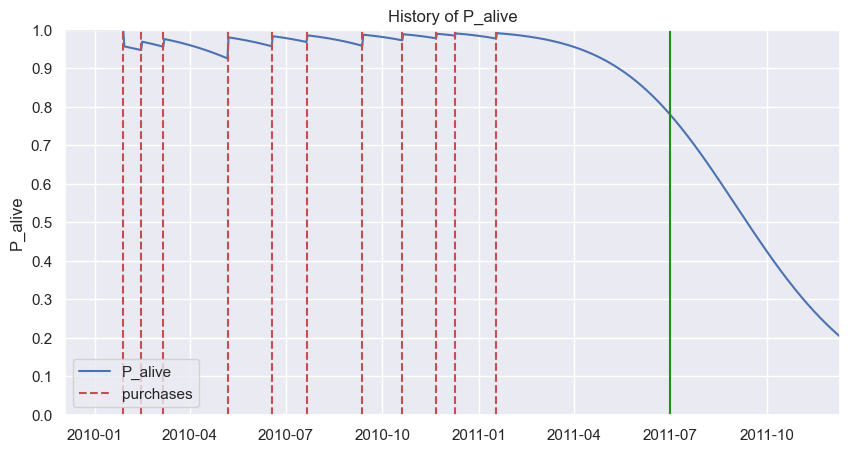

In [101]:
f = plt.figure(figsize=(10, 5))
plot_path(inactive_after_july[0], july_line=True)

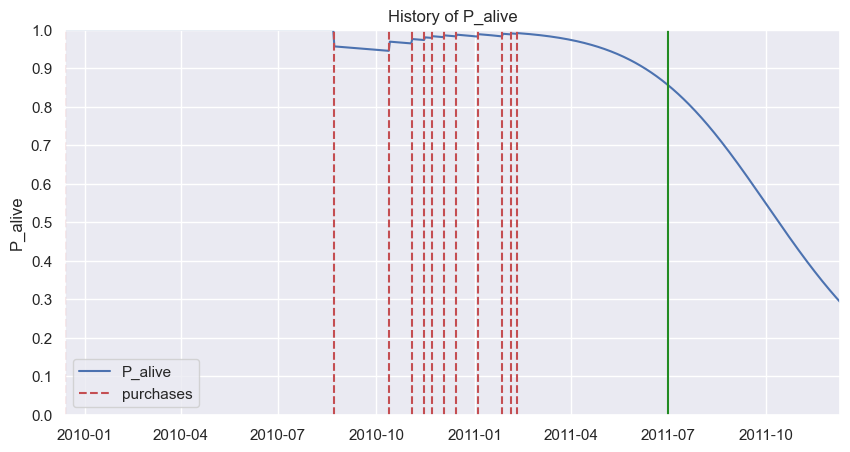

In [102]:
f = plt.figure(figsize=(10, 5))
plot_path(inactive_after_july[5], july_line=True)

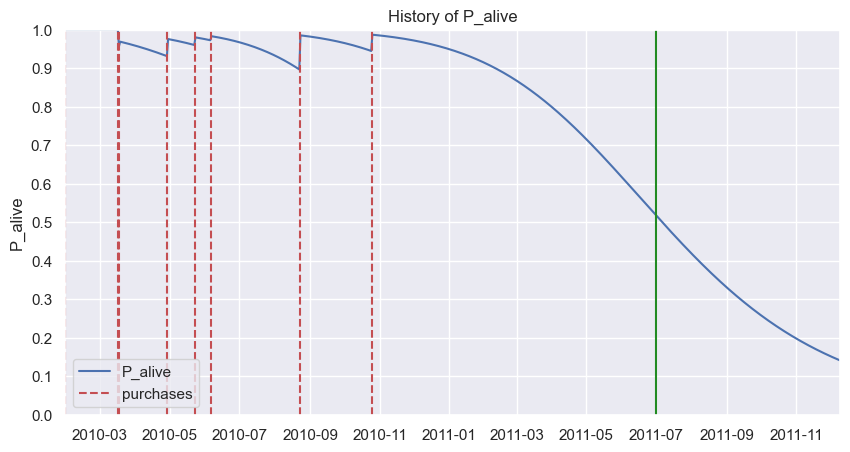

In [103]:
f = plt.figure(figsize=(10, 5))
plot_path(inactive_after_july[10], july_line=True)

### Are there any users in high risk of churning by the end of 2011?

To determine this we need to gather customers that survided the end of the 2011 and have a low number of expected number of transactions in the future. Here the future is 22 days since the last date in the dataset is the 9th of December 2011.

In [104]:
alive_after_july = []
for k, v in alive_paths.items():
      
    # if customer made is first order before july 2011
    if len(v) >= ndays:
        v_ = list(v)[-ndays:]
    else:
        v_ = v
    
    # remove users that have less than 2 consecutives transactions
    if rfml.loc[k, "frequency"] < 1:
        continue
        
    # users that are still alive in the second half of 2011
    if min(v_) > 0.5:
        alive_after_july.append(k)

We compute the expected number of purchases in the next 22 days and rank the customers.

In [105]:
t = 22
rfml["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, rfml["frequency"], rfml["recency"], rfml["T"])
rfml.sort_values(by="predicted_purchases", ascending=False).head(5)

,frequency,recency,T,monetary_value,predicted_purchases
Customer ID,,,,,
14911.0,254.0,737.0,738.0,1144.437717,6.978136
12748.0,201.0,735.0,735.0,265.344726,5.546870
15311.0,195.0,738.0,738.0,585.350769,5.361628
17841.0,192.0,736.0,737.0,354.268437,5.285160
14606.0,180.0,735.0,736.0,165.202056,4.961990


Below is the distribution the predicted number of transactions in the next 22 days.

Text(0.5, 0, 'predicted number of transactions (in 22 days)')

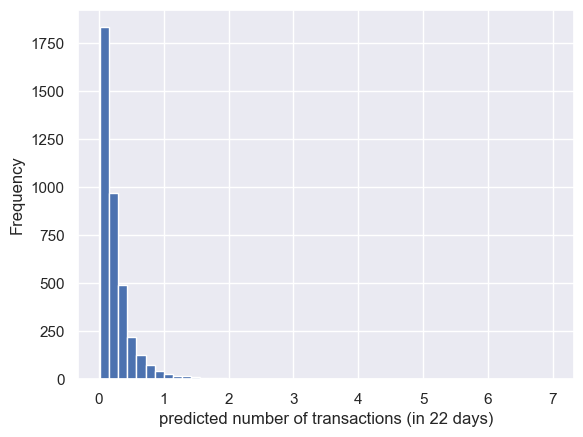

In [106]:
ax = rfml.loc[alive_after_july, "predicted_purchases"].plot(kind="hist", bins=50)
ax.set_xlabel("predicted number of transactions (in 22 days)")

Let's plot the normalized distributions the predicted number of transactions in the next 22 days, for customers probably alived in the second half of 2011, for each cluster group defined above.

In [107]:
rfml.loc[customer_ids, "cluster"] = rfm.loc[customer_ids, "cluster"]

/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/2422509647.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_c["predicted_purchases"], kde=True,
/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/2422509647.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


Text(0.5, 0, 'predicted number of transactions (in 22 days)')

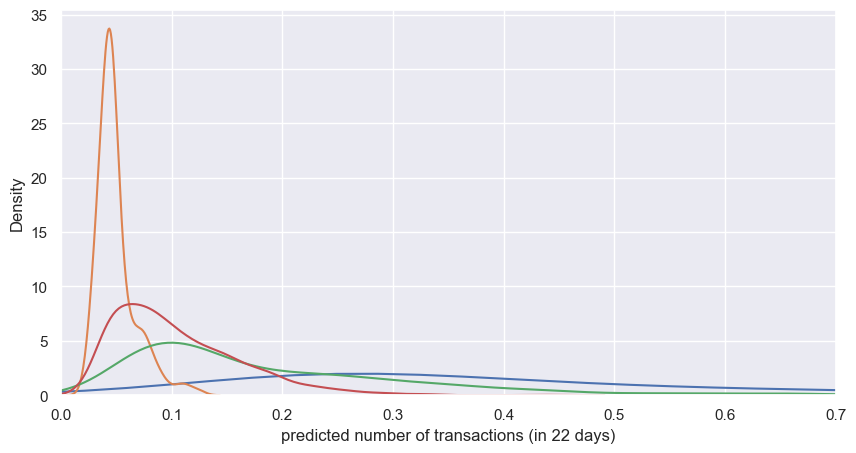

In [108]:
f = plt.figure(figsize=(10, 5))

for c in range(5):
    rfm_c =  rfml.loc[alive_after_july].query(f"cluster == {c}")
    label = f"Cluster {c}"

    sns.distplot(rfm_c["predicted_purchases"], kde=True, 
                 label=label, hist=False, norm_hist=True)
plt.xlim(0, 0.7)
plt.xlabel("predicted number of transactions (in 22 days)")

As we see member of the cluster 3 have higher risks of churning in the next 22 days. We could also select a fraction of the customers with the lowest predicted number of transactions and act in order to keep them.

In [109]:
rfml.loc[alive_after_july]["cluster"].value_counts()

0    1606
3    1150
2     874
1     223
Name: cluster, dtype: int64

In [110]:
rfml.loc[alive_after_july].groupby("cluster").mean()

,frequency,recency,T,monetary_value,predicted_purchases
cluster,,,,,
0,12.633250,548.428394,578.483188,614.342426,0.450969
1,1.035874,164.735426,542.443946,139.364417,0.049810
2,1.813501,285.774600,322.854691,271.978339,0.188220
3,2.825217,310.893913,566.632174,411.535025,0.104940


In [111]:
rfm.groupby("cluster").mean()

,frequency,recency,monetary
cluster,,,
0,15.522282,32.453357,8246.041853
1,1.188023,430.620734,278.899640
2,2.394822,39.729773,665.015366
3,4.288762,292.283073,1594.167637


### Customer Lifetime Value

Let's compute for each customer its CLV and compare for each cluster.

In [112]:
rfml[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.045241
frequency,0.045241,1.000000


In [113]:
from lifetimes import GammaGammaFitter

rfml_m = rfml[rfml.monetary_value > 0]


ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(rfml_m['frequency'],
        rfml_m['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4189 subjects, p: 2.16, q: 3.48, v: 459.75>


In [114]:
print(ggf.conditional_expected_average_profit(
        rfml_m['frequency'],
        rfml_m['monetary_value']
    ).head(10))

Customer ID
12346.0    24714.000784
12347.0      585.429640
12348.0      438.468797
12349.0      921.032072
12352.0      346.090400
12353.0      255.537067
12355.0      428.022086
12356.0      963.172566
12357.0     3104.832173
12358.0      566.688050
dtype: float64


In [115]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        rfml_m['frequency'],
        rfml_m['monetary_value']
    ).mean(),
    rfml_m[rfml_m['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 431.38441180412224, Average profit: 445.78207144743135


In [116]:
bgf_clv = BetaGeoFitter(penalizer_coef=0.0)
bgf_clv.fit(rfml_m['frequency'], rfml_m['recency'], rfml_m['T'])

print(ggf.customer_lifetime_value(
    bgf_clv, #the model to use to predict the number of future transactions
    rfml_m['frequency'],
    rfml_m['recency'],
    rfml_m['T'],
    rfml_m['monetary_value'],
    time=1, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(10))

Customer ID
12346.0    2519.183308
12347.0     286.471557
12348.0     125.152601
12349.0     171.879622
12352.0     191.641377
12353.0      27.882654
12355.0      38.306073
12356.0     343.229457
12357.0     424.834984
12358.0     108.479803
Name: clv, dtype: float64


In [117]:
predicted_sum  = ggf.customer_lifetime_value(
    bgf_clv, #the model to use to predict the number of future transactions
    rfml_m['frequency'],
    rfml_m['recency'],
    rfml_m['T'],
    rfml_m['monetary_value'],
    time=1, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
)

predicted_sum = pd.DataFrame(predicted_sum)

In [118]:
ids = predicted_sum.index
predicted_sum.loc[ids, "cluster"] = rfm.loc[ids, "cluster"]

/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/707134704.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_c["clv"], kde=True,
/var/folders/tb/nqt4pmyx2wbcgyhc4cbl0n1m0000gn/T/ipykernel_1231/707134704.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_c[

Text(0.5, 0, 'predicted CLV (in 1 month)')

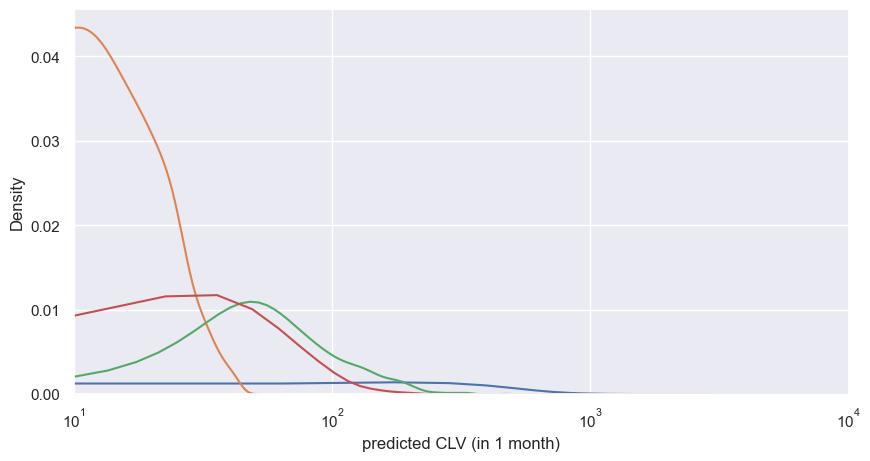

In [119]:
f, ax = plt.subplots(figsize=(10, 5))

for c in range(5):
    p_c =  predicted_sum.query(f"cluster == {c}")
    label = f"Cluster {c}"

    sns.distplot(p_c["clv"], kde=True, 
                 label=label, hist=False, ax=ax)
ax.set_xlim(10, 10000)
ax.set_xscale("log")
ax.set_xlabel("predicted CLV (in 1 month)")

In [120]:
predicted_sum.groupby("cluster").agg({"clv": ["mean", "std", "median", "sum"]})

clv                                        
               mean          std      median            sum
cluster                                                    
0        342.499236  1038.791790  175.440420  575741.216297
1         15.353046     8.943698   13.992190    3838.261390
2         86.502358    62.198747   67.724325   76727.591869
3         47.137345    80.135913   36.565909   64625.300223

In [121]:
predicted_sum["cluster"].value_counts()

0    1681
3    1371
2     887
1     250
Name: cluster, dtype: int64